# Homework 2: Problems (due 7 October 2020 before class)
### PHYS 440/540, Fall 2020
https://github.com/gtrichards/PHYS_440_540/


## Problem 1
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 draws of a (very) non-Gaussian distribution (for example chi-square with low $k$).  Demonstrate that the result confirms the central limit theorem by showing that the mean of the draws becomes Gaussian with large `N`.

Note that you'll need functions to both generate the true distribution and also to take random draws from it.

See below for code starter.


## Problem 2

On Data Camp:

Do Chapters 1 and 2 of "Exploratory Data Analysis in Python" to get some practice with CDF.  

Chapter 2 is actually the only one that I care about, but it makes sense to do chapter 1 to give you some context.  Chapter 1 introduces some Pandas tools.  I'm not planning on assigning the "Data Manipulation with Pandas" course, but you might find that useful as well.  

Note this lesson talks about PMFs.  A PMF is a PDF for a discrete distribution.  For the sake of comparing this assignment to class you can think of PMFs and PDFs as the same thing.

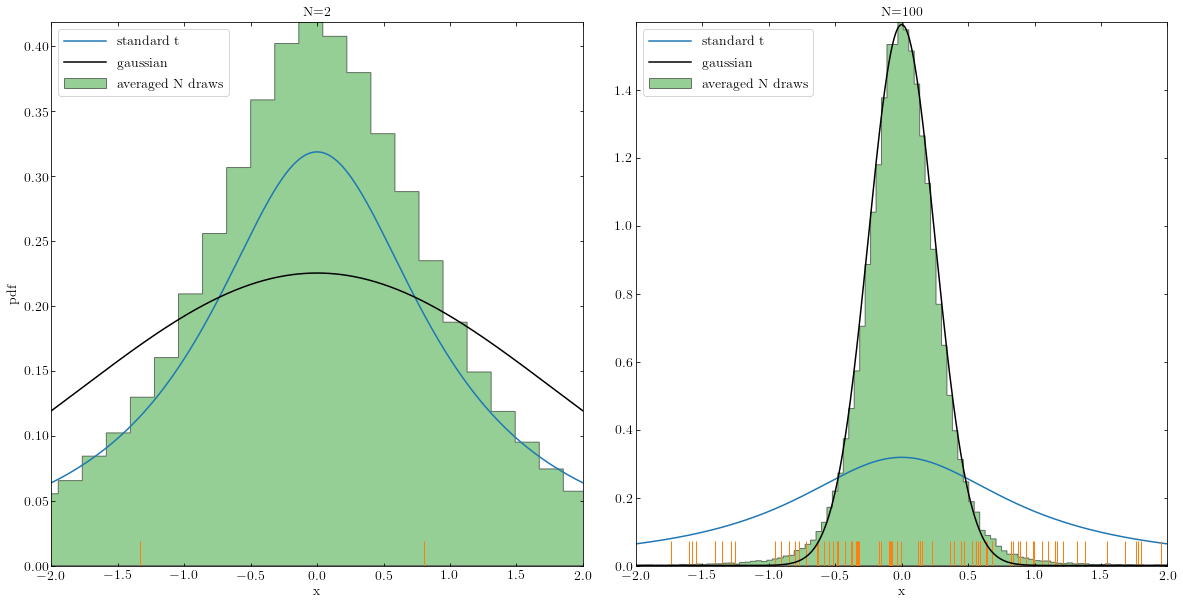

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

draws=[2,100] # Number of draws.  Show both small and large values
xgrid = np.linspace(-2,2,1000) # Array to sample the space
dist = stats.t(1,0) #Standard-t distribution

#set up 2 panels of plot
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20,10))
fig.subplots_adjust(wspace=0.1)
ax.set_xlabel('x')
ax2.set_xlabel('x')
ax.set_ylabel('pdf')
ax.set_xlim(-2,2) #Limit the x-axis range to make things easier to see
ax2.set_xlim(-2,2)
ax.set_title('N=2')
ax2.set_title('N=100')

for N, axis in zip(draws, [ax,ax2]):
    # plot lognorm vs xgrid
    axis.plot(xgrid,dist.pdf(xgrid), label='standard t') 

    #Rug plot of N random draws
    x = np.random.standard_t(2,N)
    axis.plot(x, 0*x, '|', markersize=50) #Rug plot of random draws

    # Repeat that 1,000,000 times, averaging the N draws each time
    yy = []
    for i in np.arange(100000): # Complete
        xx = np.random.standard_t(2,N)
        yy.append(xx.mean()) # Append average of those random draws to the end of the array

    #Plot the histogram with Scott or Freedman bins
    _ = axis.hist(yy,bins='scott',histtype="stepfilled",alpha=0.5, density=True, label='averaged N draws')
    
    #Overplot a Gaussian at the appropriate location
    distG = stats.norm(loc=0,scale=np.sqrt(2*np.pi/N)) # Complete
    axis.plot(xgrid,distG.pdf(xgrid), color='k', label='gaussian') # Complete

ax.legend(loc='upper left')
ax2.legend(loc='upper left')

### Grader's comments:
__Grade:__ 2.5 pts out 2.5 pts

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.